In [4]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

for j in range(n):
    qc_output.measure(j,j)
    
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

In [7]:
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_count
plot_histogram(counts)

AttributeError: Attribute get_count is not defined

In [1]:
from qiskit import plot_bloch_vector_spherical

ImportError: cannot import name 'plot_bloch_vector_spherical' from 'qiskit' (C:\Users\madua\.conda\envs\QBRONZE62\lib\site-packages\qiskit\__init__.py)

In [9]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

<ipython-input-12-45438a9a1187>:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = qc_encode + qc_output
C:\Users\madua\.conda\envs\QBRONZE62\lib\site-packages\qiskit\circuit\quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


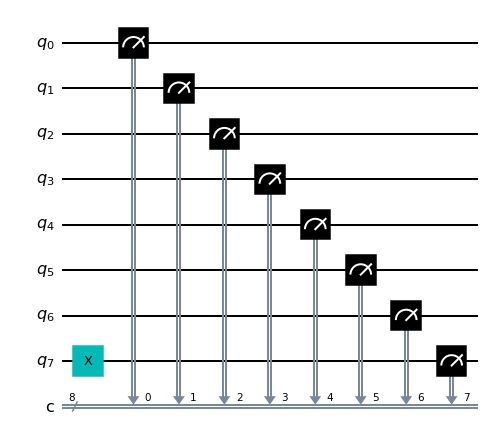

In [12]:
qc = qc_encode + qc_output
qc.draw('mpl')

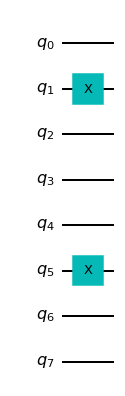

In [13]:
qc_encode = QuantumCircuit(n)
qc_encode.x(1)
qc_encode.x(5)
qc_encode.draw('mpl')

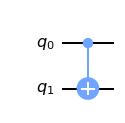

In [30]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)

qc_cnot.draw('mpl')

In [21]:
qc_cnot.draw()

TypeError: draw() missing 1 required positional argument: 'self'

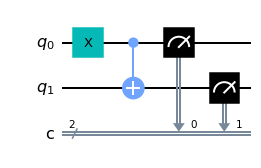

In [24]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw('mpl')


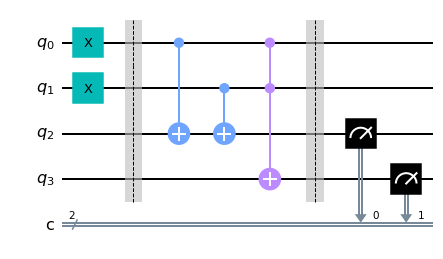

In [33]:
my_circ = QuantumCircuit(4,2)
my_circ.x(0)
my_circ.x(1)

my_circ.barrier()

my_circ.cx(0,2)
my_circ.cx(1,2)

#The ccx gate is use to write the AND of the inputs on qubit 3
my_circ.ccx(0,1,3)

my_circ.barrier()

my_circ.measure(2,0)
my_circ.measure(3,1)

my_circ.draw('mpl')

###The result is 10, which is the binary representation od the number 2, we have built a computer that can solve the famous mathematical problem of 1+1!

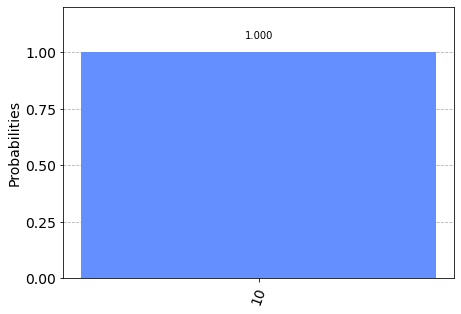

In [37]:


counts = execute(my_circ,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

The result is 10, which is the binary representation od the number 2, we have built a computer that can solve the famous mathematical problem of 1+1!

In [38]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.4', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.13.1', 'qiskit-aqua': '0.9.1', 'qiskit': '0.26.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

1.3- Exploring qubits with qiskit

In [3]:
# first we import all the tools we will need

from qiskit import QuantumCircuit, execute, Aer
from qiskit, visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

SyntaxError: invalid syntax (<ipython-input-3-650845c63f5b>, line 4)

In our quantum circuits, our qubits always start out in the state
|0>, we can use the initialize() method to transform this into
any state. we give initialize() thr vector we want in the form
of a list, and tell it which qubit(s) we want to initialize in this state.

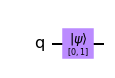

In [6]:
#qc = QuantumCircuit(1)
from qiskit import *
qc = QuantumCircuit(1) #create a quantum circuit with one qubit
initial_state = [0,1] #define initial_state as |1>
qc.initialize(initial_state, 0) #Apply initialisation operation to the 0th qubit
qc.draw('mpl') #lets view our circuit

so to visualize the circuit, we use the state vector simulator


In [ ]:
backend = Aer.get_backend('statevector_simulator') #tell qiskit how to simulate our circuit

To get the result from our circuit, we use execute to run our circuit,
giving the circuit and the backend as arguments. We then use .result() to get the result of this

In [ ]:
qc = QuantumCircuit(1) #create a quantum circuit with one qubit
initiialize_state = [0,1] #define initial_state as |1>
qc.initialize(initial_state, 0) #apply initialization operatiion to the zeroth qubit
result = execute(qc,backend).result() #do the simulation, returning the result

from result we then get the final statevector using .get_statevector()

In [8]:
qc = QuantumCircuit(1) #create a quantum circuit with one qubit
initial_state = [0,1] #define initial_state as |1>
qc.initialize(initial_state, 0) #apply initialisation operation to the 0th qubit
backend = Aer.get_backend('statevector_simulator') #tell qiskit how to simulate our circuit
result = execute(qc,backend).result()#do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) #display the output state vector

[0.+0.j 1.+0.j]


lets now measure our qubit as we would in a real quantum computer and see the result


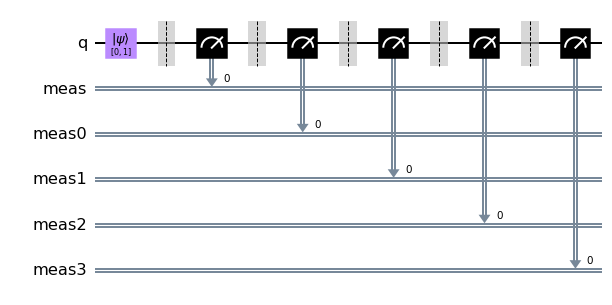

In [15]:
qc.measure_all()
qc.draw('mpl')

this time, instead of the statevector we will get the counts of the 0 and 1 results
using .get_counts()

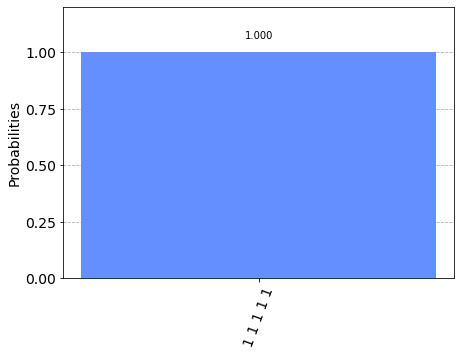

In [17]:
from qiskit.visualization import plot_histogram
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

the above result should show that we have 100% chances of measuring |1>

this time, lets instead put our qubit into a superposition and 
see what happens. we will use the state |q> from earlier in this section

|q> = 1/sqrt(2)|0> + i/sqrt(2)|1>

And we then repeat the steps for initialising the qubit as before

In [21]:
from math import sqrt
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
state = execute(qc,backend).result().get_statevector()
print(state)

[0.70710678+0.j         0.        +0.70710678j]


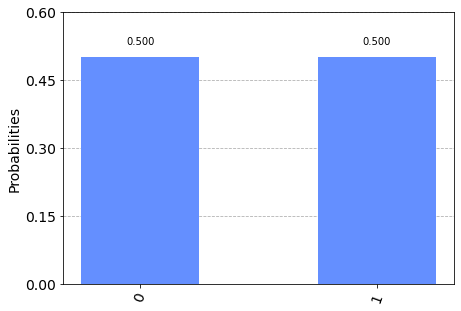

In [22]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

To achieve truly quantum computation, we must allow the qubit to 
explore more complex states. measurement are therefore only used when we need to extract an output
this means that we often place all the measurement at the end of our quantum circuit

we can demonstrate this using qiskit's statevector simulator.
Lets initialise a qubit in superposition



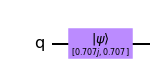

In [24]:
qc = QuantumCircuit(1)
initial_state = [0.+1.j/sqrt(2), 1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw('mpl')

The code above, initialized the statevector to |q> = 1/sqrt(2)|0> + i/sqrt(2)|1> we can verify this by using the state vector simulator

In [25]:
state = execute(qc, backend).result().get_statevector()
print('Qubit State =' + str(state))

Qubit State =[0.        +0.70710678j 0.70710678+0.j        ]


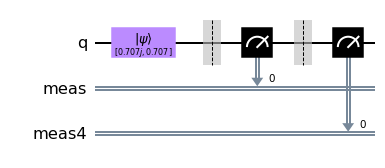

In [27]:
#lets now measure this qubit

qc.measure_all()
qc.draw('mpl')

when we simulate this entire circuit, we can see that one of the amplitudes is always 0:\
    

In [28]:
state = execute(qc, backend).result().get_statevector()
print('state of measured qubit =' + str(state))

state of measured qubit =[0.+0.j 1.+0.j]


VISUALLY REPRESENTING A QUBIT STATE

Qiskit has a function to plot a bloch sphere, plot_bloch_vector()


In [1]:
from qiskit_textbook import plot_bloch_vector_spherical
coords = [pi/2,0,1] #[Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) #Bloch Vector with spherical

ModuleNotFoundError: No module named 'qiskit_textbook'

In [1]:
!pip install qiskit_textbook


ERROR: Could not find a version that satisfies the requirement qiskit_textbook (from versions: none)
ERROR: No matching distribution found for qiskit_textbook


In [2]:
!pip install ./qiskit-textbook-src

ERROR: Invalid requirement: './qiskit-textbook-src'


In [2]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to c:\users\madua\appdata\local\temp\pip-req-build-vpqchn2r
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git 'C:\Users\madua\AppData\Local\Temp\pip-req-build-vpqchn2r'
  error: RPC failed; curl 56 OpenSSL SSL_read: Connection was reset, errno 10054
  fatal: the remote end hung up unexpectedly
  fatal: early EOF
  fatal: index-pack failed
ERROR: Command errored out with exit status 128: git clone -q https://github.com/qiskit-community/qiskit-textbook.git 'C:\Users\madua\AppData\Local\Temp\pip-req-build-vpqchn2r' Check the logs for full command output.


SINGLE QUBIT GATES

In [9]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector


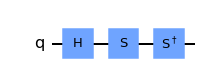

In [13]:
#lets do an X-gate on a |0>
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)
qc.sdg(0)
qc.draw('mpl')

Lets see the result of the above circuit. Note: Here we use
plot_bloch_multivector() which takes a qubit's statevector instead of the Bloch vector

In [1]:
#Lets see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

NameError: name 'Aer' is not defined

THIS BLOCH SPHERE ABOVE IS A ROTATION AROUND THE X-AXIS OF THE BLOCH SPHERE

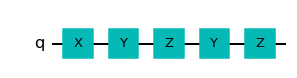

In [9]:
qc.y(0)
qc.z(0)
qc.draw('mpl')

In [1]:
#Create the X-measurement function
from qiskit import *
def x_measurement(qc,qubit,cbit):
    'measure the qubit in the X-basis, and store the result'
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

initial_state = [0,1]
#initialize our qubit and measure it
qc = QuantumCircuit
qc.initialize(initial_state, 0)
x_measurement(qc,0,0)
qc.draw('mpl')










AttributeError: 'list' object has no attribute 'qubits'

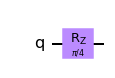

In [7]:
from qiskit import *
from math import pi
qc = QuantumCircuit(1)
qc.rz(pi/4,0)
qc.draw('mpl')

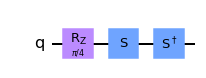

In [5]:
#to add S-gate in Qiskit

qc.s(0)
qc.sdg(0)
qc.draw('mpl')

In [5]:

qc.x(0)


backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

NameError: name 'qc' is not defined

C:\Users\madua\.conda\envs\QBRONZE62\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


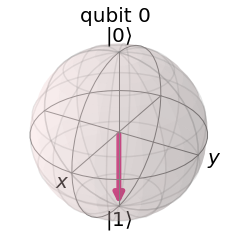

In [15]:
#Lets see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
qc.h(0)
qc.y(0)
qc.y(0)
qc.y(0)
plot_bloch_multivector(out)


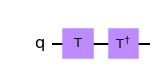

In [6]:
#to add T -gate in qiskit
qc = QuantumCircuit(1)
qc.t(0) #apply T-gate to qubit 0
qc.tdg(0)#apply Tdg-gate to qubit 0
qc.draw('mpl')

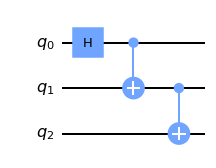

In [2]:
from qiskit import *
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

qc.draw('mpl')


MULTIPLE QUBITS AND ENTANGLED STATES

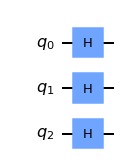

In [20]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

qc = QuantumCircuit(3)
#Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
#see the circuit:
qc.draw('mpl')

In [21]:
#lets see the result
svsim = Aer.get_backend('statvector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()



QiskitBackendNotFoundError: 'No backend matches the criteria'

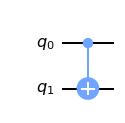

In [22]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw('mpl')